In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol
from IPython.display import display

%matplotlib inline

# Foreword/Resources
Problems are adapted and extended from the documentation found [here](https://coin-or.github.io/pulp/CaseStudies). The first few lectures from [Penn State Math 483](https://www.youtube.com/watch?v=FdKgeeb4q3w) by Wen Shen are also a great introduction and some of those problems are used here. And An Introduction to linear Programming and Game Theory 3rd Ed by Thie and Keough


## A Simple Blending Problem
Motivation: Introduce the basic anatomy of a Linear Programming Problem and show a graphical approach.

To feed his stock a farmer can purchase two kinds of feed. The farmer has determined that the herd requires at least 60, 84, and 72 units of the nutritional elements A, B, and C, respectively, per day. The contents and cost of a pound of each of the two feeds are given in the following table.

| Ingredients            | A | B   | C   | Cost ($/lb) |
|------------------------|---|-----|-----|-------------|
| Feed 1                 | 3 | 7   | 3   | 10          |
| Feed 2                 | 2 | 2   | 6   | 4           |
| Total Required by herd | 60 | 84  | 72  |



If we were to just use Feed 1 to satisfy all 3 of the requirements how much would we need?
We can divide the total required by herd quantity by the amount per pound of lb of feed to determine the amount of feed needed to satisfy the requirements.
$
\frac{60\:units\:A\:required} {3\:units\:of\:A\:per\:lb} = 20lbs\:Feed1\:provides\:60\:units\:of\:A\\

\frac{84\:units\:B\:required} {7\:units\:of\:A\:per\:lb} = 12lbs\:Feed1\:provides\:84\:units\:of\:B\\

\frac{72\:units\:C\:required} {3\:units\:of\:A\:per\:lb} = 24lbs\:Feed1\:provides\:72\:units\:of\:C\\


$
So we need 24 lbs of Feed 1 to satisfy the C requirement.


What is the problem with the above approach given we have 2 feeds to choose from?
What other choices could we have made?

Let's look at the possible choices by graphing all the constraints
Let x be lbs of Feed 1. Let y be lbs of Feed 2.
Now lets construct equations that satisfy the nutritional requirements given the two feeds

These equations are called linear **constraints**.

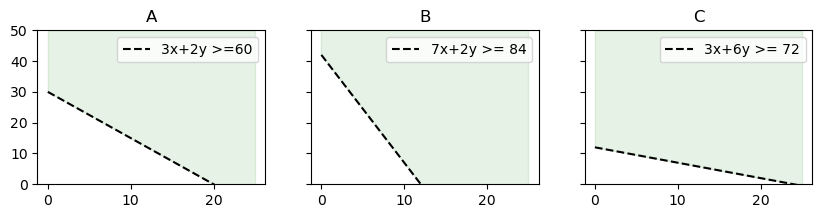

In [64]:
#Nutritional element A Constraint 3x+2y >= 60
#Nutritional element B Constraint 7x+2y >=84
#Nutritional element C Constraint 3x+6y >= 72

"""Now we will rearrange each of these equations to point slope intercept form and graph them"""

def f1(x):
    return (60-3*x)/2
def f2(x):
    return (84-7*x)/2
def f3(x):
    return (72-3*x)/6
x_vals = np.linspace(0.0,25.0,26)
f1_vals = f1(x_vals)
f2_vals = f2(x_vals)
f3_vals = f3(x_vals)

fig, ax = plt.subplots(1,3, sharey=True, figsize = (10,2))
ax[0].plot(x_vals,f1_vals,'k--', label = "3x+2y >=60")
ax[0].set_ylim([0,50])
ax[0].set_title("A")
ax[0].legend()
ax[0].fill_between(x_vals,f1_vals,50, color='green', alpha=.1)

ax[1].plot(x_vals,f2_vals,'k--', label = "7x+2y >= 84")
ax[1].fill_between(x_vals,f2_vals,50, color='green', alpha=.1)
ax[1].set_title("B")
ax[1].legend()

ax[2].plot(x_vals,f3_vals,'k--',label ="3x+6y >= 72")
ax[2].fill_between(x_vals,f3_vals,50, color='green', alpha=.1)
ax[2].set_title("C")
ax[2].legend()
# Anything selection in the shaded regions of the below graphs will satisfy the individual nutritional constraint.

/var/folders/92/90qb1m5s7fb457907bkkh81h0000gp/T/ipykernel_46843/1661550372.py:18: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax2.annotate(f"(0,{f2(0)})",xy=(0,f2(0)),textcoords="offset points")
/var/folders/92/90qb1m5s7fb457907bkkh81h0000gp/T/ipykernel_46843/1661550372.py:19: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax2.annotate(f"({(x1)},{f1(x1)})",xy=(x1,f1(x1)), textcoords="offset points")
/var/folders/92/90qb1m5s7fb457907bkkh81h0000gp/T/ipykernel_46843/1661550372.py:20: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax2.annotate(f"({x2},{f1(x2)})",xy=(x2,f1(x2)), textcoords="offset points")
/var/folders/92/90qb1m5s7fb457907bkkh81h0000gp/T/ipykernel_46843/1661550372.py:21: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can

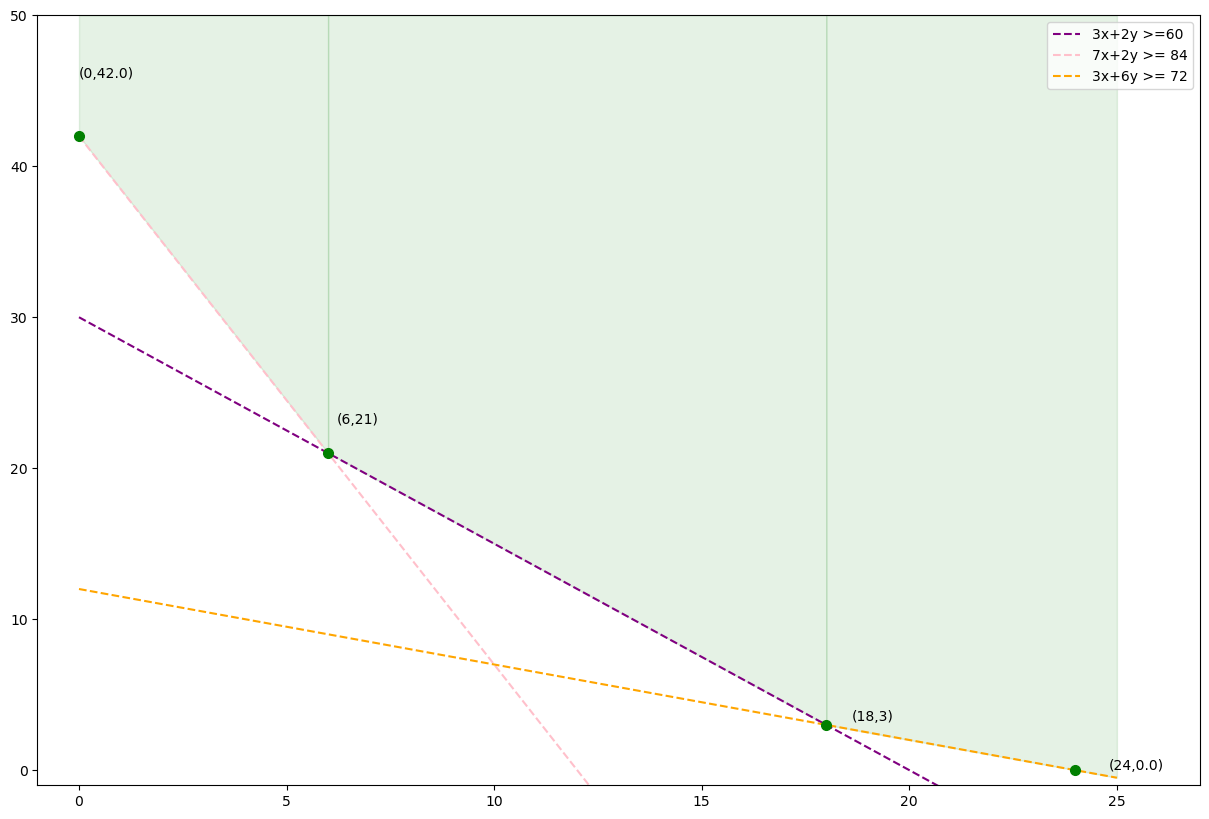

In [65]:
#Creating a feasible region for all of the constraints
fig2, ax2 = plt.subplots(figsize=(15,10))

ax2.plot(x_vals,f1_vals,'--',color='purple', label = "3x+2y >=60")
ax2.plot(x_vals,f2_vals,'--',color='pink', label = "7x+2y >= 84")
ax2.plot(x_vals,f3_vals,'--',color='orange',label ="3x+6y >= 72")

#Plotting outer intersections remember elimination for sys of eq
x = Symbol('x')
x1, = solve(f1(x)-f2(x))
y1 = f1(x1)
x2, = solve(f1(x)-f3(x))
ax2.plot(x1,f1(x1),'go',markersize=7)
ax2.plot(x2,f1(x2),'go',markersize=7)
#Zeroes look at graph for value of 24
ax2.plot(0,f2(0),'go',markersize=7)
ax2.plot(24,f3(24),'go',markersize=7)
ax2.annotate(f"(0,{f2(0)})",xy=(0,f2(0)),textcoords="offset points")
ax2.annotate(f"({(x1)},{f1(x1)})",xy=(x1,f1(x1)), textcoords="offset points")
ax2.annotate(f"({x2},{f1(x2)})",xy=(x2,f1(x2)), textcoords="offset points")
ax2.annotate(f"(24,{f3(24)})",xy=(24,f3(24)), textcoords="offset points")


ax2.plot()
ax2.set_ylim([-1,50])
ax2.set_xlim([-1,27])

#ax2.grid(True, which='both', linestyle = ':')

# This code section sort of shows that before
ax2.fill_between(x_vals[:7],f2_vals[:7],50, color='green', alpha=.1)
ax2.fill_between(x_vals[6:19],f1_vals[6:19],50,color='green', alpha=.1)
ax2.fill_between(x_vals[18:],f3_vals[18:],50,color='green', alpha=.1)


#UNCOMMENT FOR COST FUNCTION THAT OFFERS THE LOWEST PRICE
# c_vals_144 = np.linspace(144,144,26)
# def cost_function(x,c):
#     return (c - 10*x)/4
# f_price_144 = cost_function(x_vals,c_vals_144)
# ax2.plot(x_vals,f_price_144,'--',color='b', label = "COST 10x+4y =144")
ax2.legend()




## A feasible region of solutions
Any coordinate in the shaded region of the above graph will satisy our constraints.
Let's pick one and test that theory. Note the herd is infinitely hungry, and we aren't considering individual herd members.

In [66]:
selected_x = 50
selected_y = 50
#Nutritional element A Constraint 3x+2y >= 60
a_content = 3*selected_x+2*selected_y
test_a = a_content >= 60
#Nutritional element B Constraint 7x+2y >=84
b_content = 7*selected_x+3*selected_y
test_b = b_content >= 84
#Nutritional element C Constraint 3x+6y >= 72
c_content = 3*selected_x+6*selected_y
test_c = c_content>=72

print(f"{all([test_a,test_b,test_c])} A:{a_content} units B:{b_content} units, C:{c_content} units ")
print(f"The cost of the above formulation is {10*selected_x+4*selected_x}$/lb")

True A:250 units B:500 units, C:450 units 
The cost of the above formulation is 700$/lb


## What is our objective while solving this problem?
What are we minimizing or maximizing?

The cost to our farmer is currently way to high!
Our objective is to minimize the Total cost.

$$
Minimize: Cost = 10 * x + 4 * y
$$

So let us consider the graphs of the family of graphs represented by 10x+4y = c where c is a constant (the cost)
This family of possible cost functions is shown below we want to select the cost function with the lowest cost that lies within the feasible region.


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25.]
[200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.
 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200. 200.]


(0.0, 50.0)

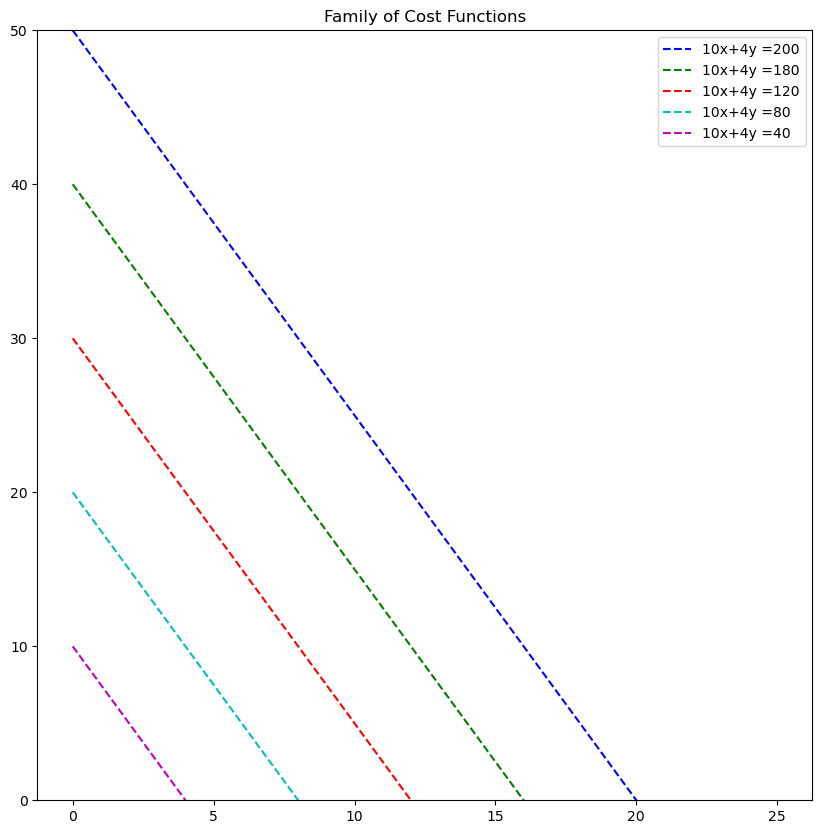

In [67]:
def cost_function(x,c):
    return (c - 10*x)/4

c_vals_200 = np.linspace(200,200,26)
c_vals_160 = np.linspace(160,160,26)
c_vals_120 = np.linspace(120,120,26)
c_vals_80 = np.linspace(80,80,26)
c_vals_40 = np.linspace(40,40,26)

print(x_vals)
print(c_vals_200)

f_price_200 = cost_function(x_vals,c_vals_200)
f_price_160 = cost_function(x_vals,c_vals_160)
f_price_120 = cost_function(x_vals,c_vals_120)
f_price_80 = cost_function(x_vals,c_vals_80)
f_price_40 = cost_function(x_vals,c_vals_40)

fig, ax = plt.subplots(figsize = (10,10))

ax.set_title('Family of Cost Functions')
ax.plot(x_vals,f_price_200,'--',color='b', label = "10x+4y =200")
ax.plot(x_vals,f_price_160,'--',color='g', label = "10x+4y =180")
ax.plot(x_vals,f_price_120,'--',color='r', label = "10x+4y =120")
ax.plot(x_vals,f_price_80,'--',color='c', label = "10x+4y =80")
ax.plot(x_vals,f_price_40,'--',color='m', label = "10x+4y =40")



ax.legend()
ax.set_ylim([0,50])

# What does it mean to pick a point along any of these lines how much will it cost. What is the amount of feed. Choose a point plug it into one of the cost functions.

Each of these lines has a constant value for the cost function. 40,80,120,etc. We seek the line furthest to the left. That is the one with the **lowest** cost. That also intersects our shaded feasible region. Look back at the graph from before and realize that one of the points at the bottom corners of the feasible region will give us the lowest price. Let's test each of those points.

In [68]:
def cost(x,y):
    return 10*x+4*y

cost1=cost(0,42)
cost2=(cost(6,21))
cost3 = (cost(18,3))
cost4 = (cost(24,0))
print(f"1:{cost1} 2:{cost2} 3:{cost3} 4:{cost4}")
#Show graph with cost contour line added above

1:168 2:144 3:192 4:240


Thus, we have arrived at our solution using 6lbs of feed 1 and 21lbs of feed 2 will satify each of our constraints while minimizing our cost.


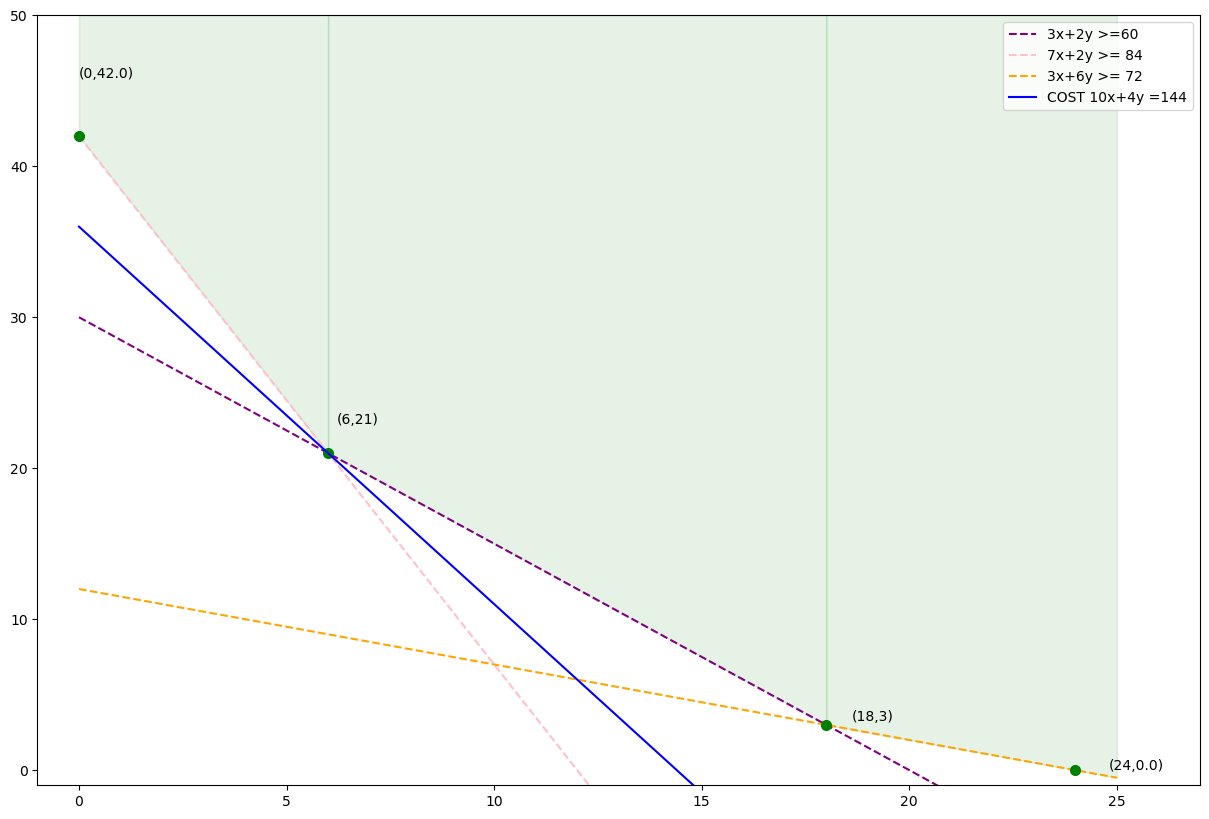

In [69]:
c_vals_144 = np.linspace(144,144,26)
def cost_function(x,c):
    return (c - 10*x)/4
f_price_144 = cost_function(x_vals,c_vals_144)
lines = ax2.plot(x_vals,f_price_144,'-',color='b', label = "COST 10x+4y =144")
ax2.legend()
display(fig2)


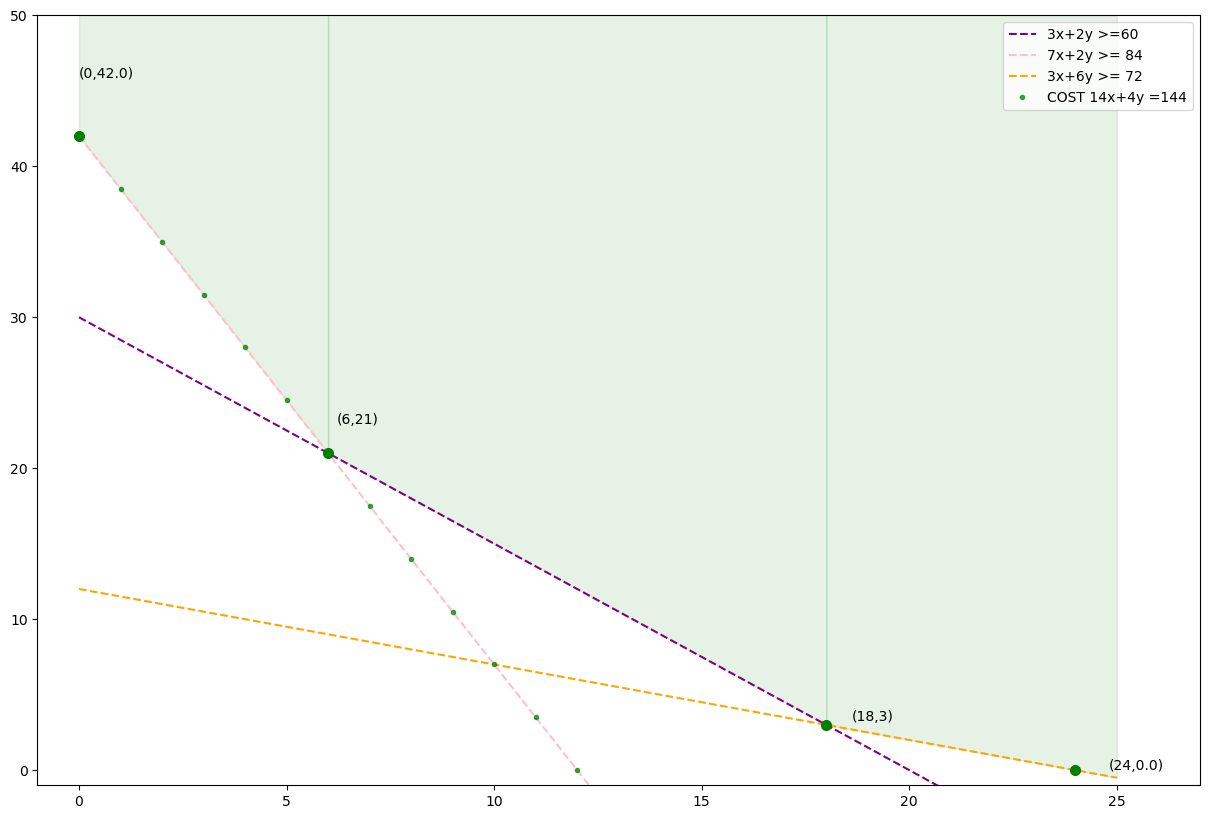

In [70]:
#What happens if we change the prices thus the slope of the price function / object function. What are our potential situations for our answers?
#this example we increase the price of feed1 by 4$/lb

#Notice how any point on the line segment between 0,42 and 6,21 has both a cost of 144 the minimal cost in the feasible region AND satisfies all of our constraints.
ax2.lines.remove(lines[0])
c_vals_168 = np.linspace(168,168,26)
def cost_function_adjusted(x,c):
    return (c - 14*x)/4
f_price_168 = cost_function_adjusted(x_vals,c_vals_168)
ax2.plot(x_vals,f_price_168,'.',color='g', label = "COST 14x+4y =144", alpha=.7)
ax2.legend()
display(fig2)

# RECAP
Linear Programming Problems have:
- A **Linear** objective function: some value to be minimized or maximized within a set of constraints in our example price
- **Linear** Constraints: A set of requirements that our solution must follow.
- A **Feasible** region: The region where any point would satisfy all of our constraints.


# Using PuLP
Let's look at a more complex problem that would not easily be graphed.



# Placing Items in a Grid Sudoku 4x4

Soft Constraints 4x4 sudoku with all solutions exhausted allow for some soft.

Objective weighting tuning the model, what it takes for a locked event to move.